<a href="https://colab.research.google.com/github/Jac0b03/AMA-3020-Solo-Project/blob/main/Chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

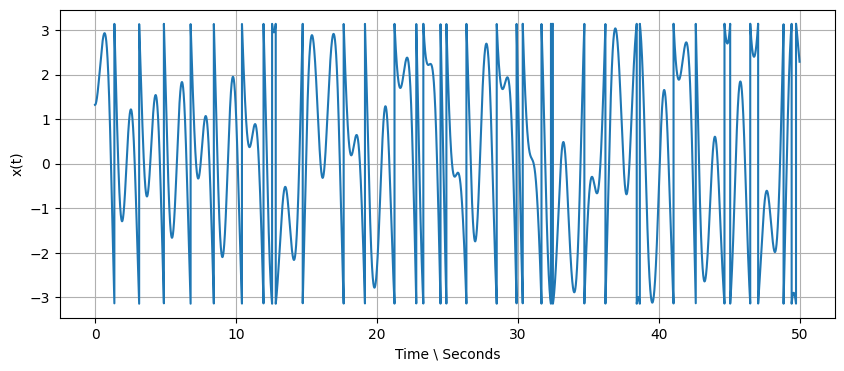

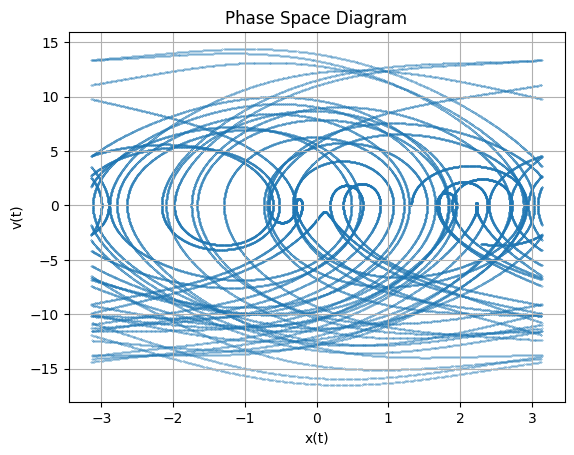

In [4]:
# Parameters
g = 9.81
L = 0.5 + 3029/10000
b = 0.3  # Damping coefficient
a = 27  # Amplitude of the driving force
c=10
omega = np.sqrt(g/L)  # Approitae omega

# Initial conditions
initialx = [np.pi/2, np.pi/2-0.1, np.pi/2-0.25]  # Range of initial vaules
v0 = 0  # Initialvelocity
frequencies = []  # To store frequencies for each initial angle
velocities = []  # To store velocities for each initial angle

# Time parameters
t0 = 0
tmax = 50
dt = 0.001
num_steps = int((tmax - t0) / dt) + 1

# Define the differential equations for the non-linear pendulum
def f(t, x, v):
    x_dot = v
    v_dot = -c*np.sin(x) +a*np.cos(omega* t ) - b*v
    return x_dot, v_dot

for x0 in initialx:
    # Arrays to store the values using NumPy
    tvalues = np.zeros(num_steps + 1)
    xvalues = np.zeros(num_steps + 1)
    vvalues = np.zeros(num_steps + 1)

    # Initial conditions
    tvalues[0] = t0
    xvalues[0] = x0
    vvalues[0] = v0

    # Runge-Kutta integration
    for i in range(num_steps):
        t = tvalues[i]
        x = xvalues[i]
        v = vvalues[i]
        k1_x, k1_v = f(t, x, v)
        k2_x, k2_v = f(t + dt / 2, x + dt / 2 * k1_x, v + dt / 2 * k1_v)
        k3_x, k3_v = f(t + dt / 2, x + dt / 2 * k2_x, v + dt / 2 * k2_v)
        k4_x, k4_v = f(t + dt, x + dt * k3_x, v + dt * k3_v)
        tvalues[i + 1] = t + dt
        x_new = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        x_new = np.arctan2(np.sin(x_new), np.cos(x_new))
        xvalues[i + 1] = x_new
        vvalues[i + 1] = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)



# Plot time against oscillation amplitude
plt.figure(figsize=(10, 4))
plt.plot(tvalues, xvalues, label='')
plt.xlabel('Time \ Seconds')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()

# Plot the phase space diagram
plt.scatter(xvalues, vvalues, label='Phase Space', s=0.05)
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.title('Phase Space Diagram')
plt.grid(True)
plt.show()


PLot of chaos with small petrubations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.81
L = 0.5 + 3029/10000
b = 0.3  # Damping coefficient
a = 25  # Amplitude of the driving force
omega = np.sqrt(g/L)  # Appropriate omega

# Initial conditions
initialx = [np.pi/2 ,np.pi/2 -0.1,np.pi/2-0.2]  # Range of initial values
v0 = 2 # Initial velocity
frequencies = []  # To store frequencies for each initial angle
velocities = []  # To store velocities for each initial angle

# Time parameters
t0 = 0
tmax = 50
dt = 0.001
num_steps = int((tmax - t0) / dt) + 1

# Define the differential equations for the non-linear pendulum
def f(t, x, v):
    x_dot = v
    v_dot = -(10)*np.sin(x) + a*np.cos(omega* t) - b*v
    return x_dot, v_dot

# Plot time against oscillation amplitude for each initial condition
plt.figure(figsize=(10, 6))
for x0 in initialx:
    # Arrays to store the values using NumPy
    tvalues = np.zeros(num_steps + 1)
    xvalues = np.zeros(num_steps + 1)
    vvalues = np.zeros(num_steps + 1)

    # Initial conditions
    tvalues[0] = t0
    xvalues[0] = x0
    vvalues[0] = v0

    # Runge-Kutta integration
    for i in range(num_steps):
        t = tvalues[i]
        x = xvalues[i]
        v = vvalues[i]
        k1_x, k1_v = f(t, x, v)
        k2_x, k2_v = f(t + dt / 2, x + dt / 2 * k1_x, v + dt / 2 * k1_v)
        k3_x, k3_v = f(t + dt / 2, x + dt / 2 * k2_x, v + dt / 2 * k2_v)
        k4_x, k4_v = f(t + dt, x + dt * k3_x, v + dt * k3_v)
        tvalues[i + 1] = t + dt
        x_new = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        x_new = np.arctan2(np.sin(x_new), np.cos(x_new))
        xvalues[i + 1] = x_new
        vvalues[i + 1] = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    # Plot motion
    plt.plot(tvalues, xvalues, label=f'x(0)= {x0:.2f}')

plt.xlabel('Time \ Seconds')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.savefig('Motion.pdf')

# Plot phase space diagrams for each initial condition
plt.figure(figsize=(8, 6))
for x0 in initialx:
    # Arrays to store the values using NumPy
    tvalues = np.zeros(num_steps + 1)
    xvalues = np.zeros(num_steps + 1)
    vvalues = np.zeros(num_steps + 1)

    # Initial conditions
    tvalues[0] = t0
    xvalues[0] = x0
    vvalues[0] = v0

    # Runge-Kutta integration
    for i in range(num_steps):
        t = tvalues[i]
        x = xvalues[i]
        v = vvalues[i]
        k1_x, k1_v = f(t, x, v)
        k2_x, k2_v = f(t + dt / 2, x + dt / 2 * k1_x, v + dt / 2 * k1_v)
        k3_x, k3_v = f(t + dt / 2, x + dt / 2 * k2_x, v + dt / 2 * k2_v)
        k4_x, k4_v = f(t + dt, x + dt * k3_x, v + dt * k3_v)
        tvalues[i + 1] = t + dt
        x_new = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        x_new = np.arctan2(np.sin(x_new), np.cos(x_new))
        xvalues[i + 1] = x_new
        vvalues[i + 1] = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    # Plot phase space
    plt.scatter(xvalues, vvalues, s=0.1, label=f'x(0)= {x0:.2f}')

plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.grid(True)
plt.legend(scatterpoints=100)
plt.savefig('Phase Space.pdf')

Bifurcation Plot

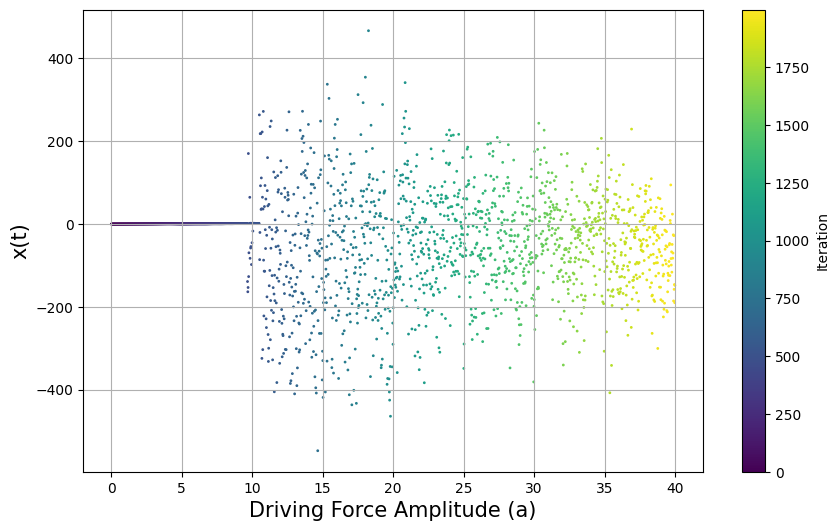

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the differential equation
def diff_eq(t, x, v, a):
    omega = 1.0  # Frequency
    b = 0.1  # Damping coefficient
    c=10
    dxdt = v
    dvdt = (-c) * np.sin(x) + a * np.cos(omega * t) - b * v
    return dxdt, dvdt

# Initial conditions
initial_x = np.pi / 2
v0 = 0.0  # Initial velocity

# Time parameters
t0 = 0
tmax = 50
dt = 0.001
num_steps = int((tmax - t0) / dt) + 1

# Arrays to store the values using NumPy
t_values = np.zeros(num_steps + 1)
x_values = np.zeros(num_steps + 1)
v_values = np.zeros(num_steps + 1)

# Arrays to store final angles for each value of the driving force
final_x = []

# Range of driving forces
a_values = np.linspace(0, 40, 2000)

# Create a colormap
colormap = cm.viridis

# Runge-Kutta integration
for a in a_values:
    # Reset initial conditions for each iteration
    x_values[0] = initial_x
    v_values[0] = v0

    for i in range(num_steps):
        t = t_values[i]
        x = x_values[i]
        v = v_values[i]

        k1x, k1v = diff_eq(t, x, v, a)
        k2x, k2v = diff_eq(t + dt / 2, x + dt / 2 * k1x, v + dt / 2 * k1v, a)
        k3x, k3v = diff_eq(t + dt / 2, x + dt / 2 * k2x, v + dt / 2 * k2v, a)
        k4x, k4v = diff_eq(t + dt, x + dt * k3x, v + dt * k3v, a)

        x_values[i + 1] = x + dt / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v_values[i + 1] = v + dt / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        t_values[i + 1] = t + dt

    # Record the final angle after a certain number of iterations
    final_x.append(x_values[-1])

# Plot bifurcation diagram with color gradient
plt.figure(figsize=(10, 6))
plt.scatter(a_values, final_x, c=np.arange(len(a_values)), cmap=colormap, marker='.', s=4)
plt.colorbar(label='Iteration')
plt.xlabel('Driving Force Amplitude (a)', fontsize=15)
plt.ylabel('x(t)', fontsize=15)
plt.grid(True)
plt.savefig('Transition.pdf')